In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/gender-wage-gap-in-the-usa-1973-2022'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-wage-gap-in-the-usa-1973-2022/gender_wage_gap.csv


In [2]:
df = pd.read_csv("/kaggle/input/gender-wage-gap-in-the-usa-1973-2022/gender_wage_gap.csv")
df.head()

,year,men_median,men_average,women_median,women_average,white_men_median,white_men_average,black_men_median,black_men_average,hispanic_men_median,hispanic_men_average,white_women_median,white_women_average,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average
0,2022,24.91,35.82,20.74,27.86,27.11,39.10,20.02,27.43,19.99,26.63,22.47,29.50,19.00,23.99,17.54,22.60
1,2021,24.93,35.61,21.46,28.28,27.76,38.78,20.08,26.88,20.20,26.45,22.76,29.90,18.85,24.13,17.77,22.90
2,2020,25.95,36.03,21.72,28.75,28.36,39.08,20.56,27.40,20.41,27.05,23.05,30.30,19.26,24.87,17.55,23.03
3,2019,24.04,33.65,20.42,26.83,27.39,36.84,19.31,25.18,19.39,25.08,22.01,28.41,18.08,23.17,17.08,21.50
4,2018,23.42,33.19,19.73,26.21,26.79,36.55,18.66,24.67,18.77,24.55,21.75,28.01,17.34,22.55,16.24,20.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    50 non-null     int64  
 1   men_median              50 non-null     float64
 2   men_average             50 non-null     float64
 3   women_median            50 non-null     float64
 4   women_average           50 non-null     float64
 5   white_men_median        50 non-null     float64
 6   white_men_average       50 non-null     float64
 7   black_men_median        50 non-null     float64
 8   black_men_average       50 non-null     float64
 9   hispanic_men_median     50 non-null     float64
 10  hispanic_men_average    50 non-null     float64
 11  white_women_median      50 non-null     float64
 12  white_women_average     50 non-null     float64
 13  black_women_median      50 non-null     float64
 14  black_women_average     50 non-null     floa

In [4]:
df.describe()

,year,men_median,men_average,women_median,women_average,white_men_median,white_men_average,black_men_median,black_men_average,hispanic_men_median,hispanic_men_average,white_women_median,white_women_average,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,23.241000,28.921400,17.59580,21.699400,25.220600,30.959800,18.55500,22.519200,17.293800,21.432600,18.437600,22.53180,15.916200,19.541400,14.532800,17.845400
std,14.57738,0.912702,2.706539,1.90173,3.362138,1.155788,3.444436,0.83803,1.791357,1.329548,1.908348,2.384421,3.88397,1.527008,2.407148,1.148307,2.062507
min,1973.00000,21.510000,26.200000,14.88000,17.010000,23.160000,27.340000,16.90000,20.400000,14.970000,18.930000,15.220000,17.23000,13.380000,15.680000,13.250000,15.070000
25%,1985.25000,22.815000,26.630000,15.84000,18.540000,24.445000,27.952500,18.03250,21.075000,16.442500,20.515000,16.105000,18.82750,14.710000,17.375000,13.665000,16.267500
50%,1997.50000,23.360000,27.855000,17.43500,21.365000,25.135000,29.660000,18.68000,22.000000,17.220000,21.060000,18.110000,22.21500,15.775000,19.165000,14.115000,17.250000
75%,2009.75000,23.765000,30.185000,19.05500,24.295000,26.000000,32.885000,19.11750,23.512500,18.330000,21.807500,20.310000,25.62500,17.067500,21.427500,14.997500,19.120000
max,2022.00000,25.950000,36.030000,21.72000,28.750000,28.360000,39.100000,20.56000,27.430000,20.410000,27.050000,23.050000,30.30000,19.260000,24.870000,17.770000,23.030000


1.Wage Gap Averages:

* On average, the median wage for men is higher than the median wage for women, indicating a gender wage gap.
* The same pattern is observed in average wages, with men earning more on average than women.

2.Wage Gap Variability:
* There is variability in wage gaps over the years, as evidenced by the standard deviations for both median and average wages.
* This variability suggests that the gender wage gap fluctuates from year to year, with some years potentially exhibiting larger wage disparities than others.

In [5]:
df.shape

(50, 17)

In [6]:
df.isna().sum()

year                      0
men_median                0
men_average               0
women_median              0
women_average             0
white_men_median          0
white_men_average         0
black_men_median          0
black_men_average         0
hispanic_men_median       0
hispanic_men_average      0
white_women_median        0
white_women_average       0
black_women_median        0
black_women_average       0
hispanic_women_median     0
hispanic_women_average    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization

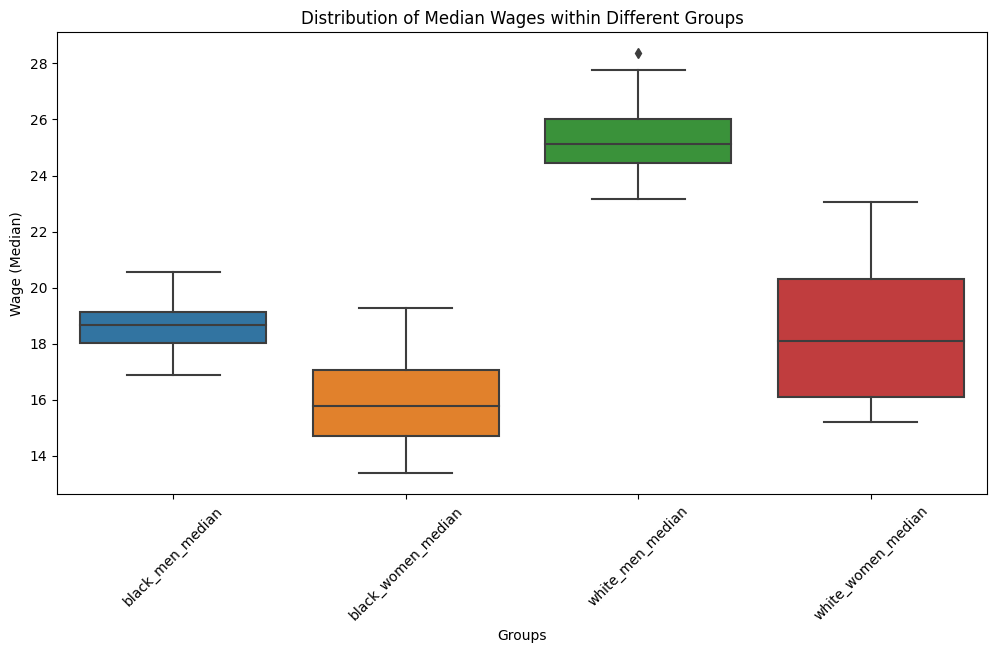

In [8]:
data_to_plot = df[['black_men_median', 'black_women_median', 'white_men_median', 'white_women_median']]

# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_to_plot)
plt.xlabel('Groups')
plt.ylabel('Wage (Median)')
plt.title('Distribution of Median Wages within Different Groups')
plt.xticks(rotation=45)
plt.show()

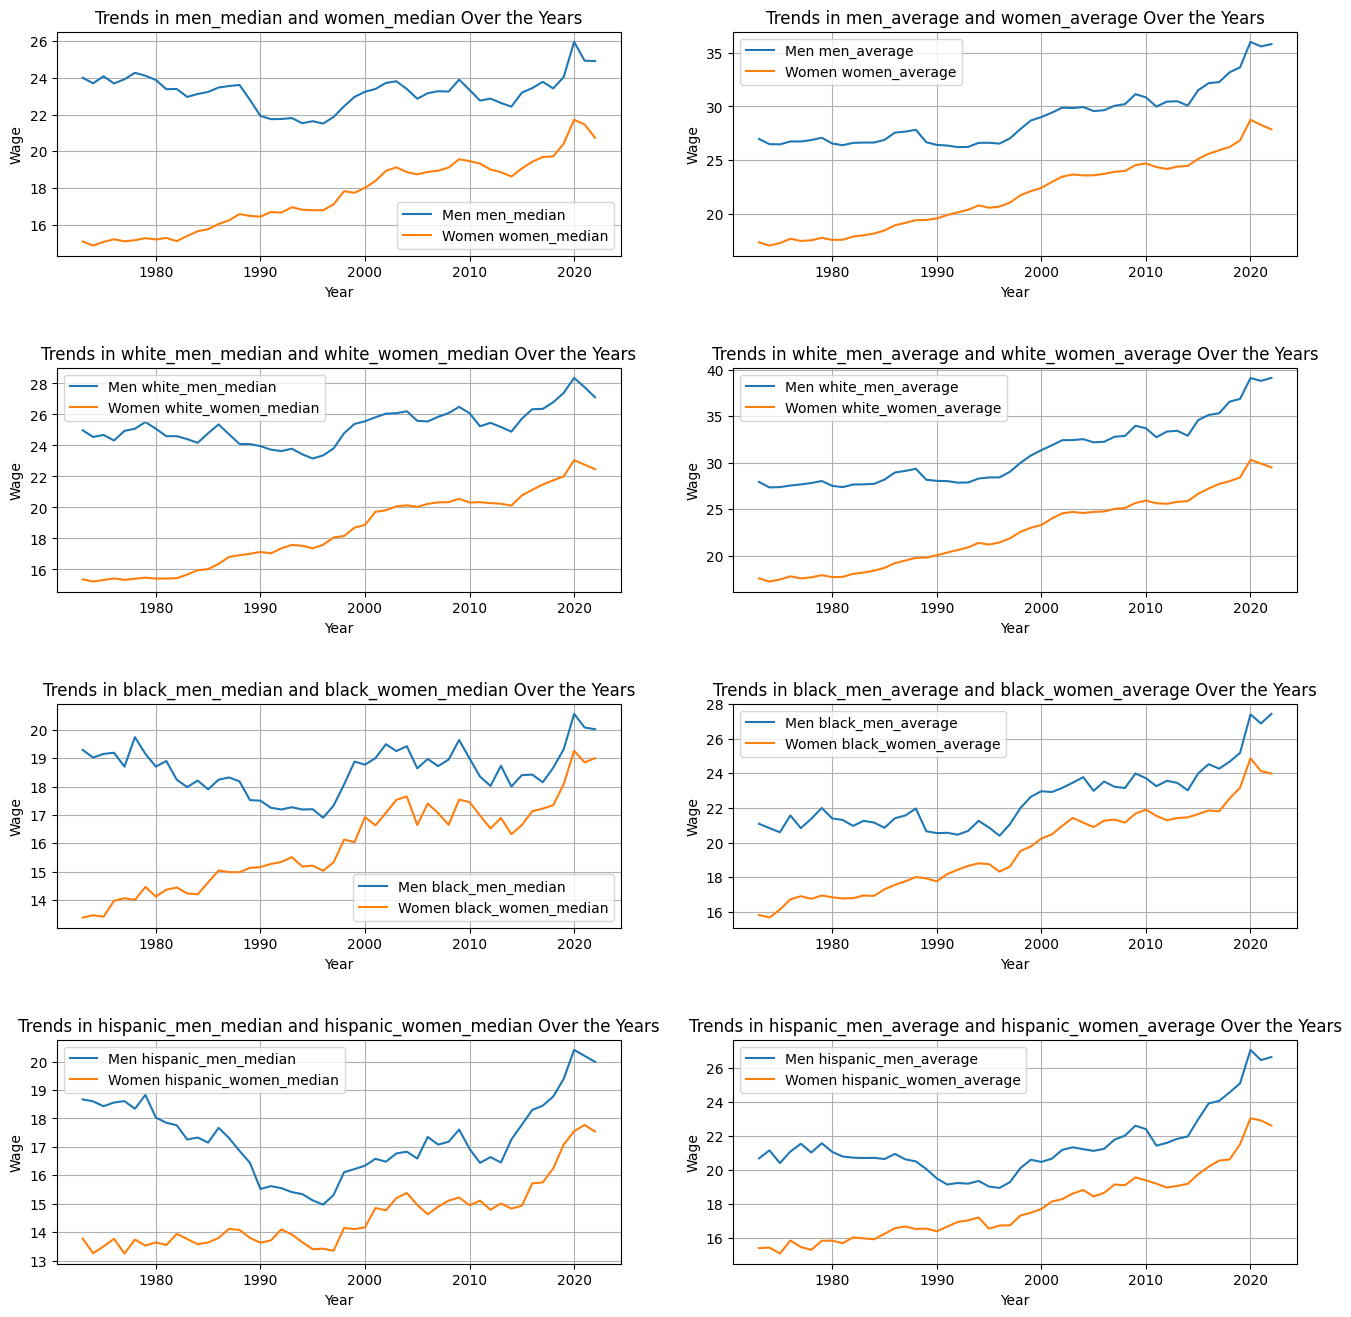

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

year = df['year']
columns_to_plot = [
    ('men_median', 'women_median'),
    ('men_average', 'women_average'),
    ('white_men_median', 'white_women_median'),
    ('white_men_average', 'white_women_average'),
    ('black_men_median', 'black_women_median'),
    ('black_men_average', 'black_women_average'),
    ('hispanic_men_median', 'hispanic_women_median'),
    ('hispanic_men_average', 'hispanic_women_average')
]
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.5)
for i, (col1, col2) in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    
    # Data
    men_data = df[col1]
    women_data = df[col2]
    
    # Create a line plot
    sns.lineplot(x=year, y=men_data, label=f'Men {col1}', ax=axes[row, col])
    sns.lineplot(x=year, y=women_data, label=f'Women {col2}', ax=axes[row, col])
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Wage')
    axes[row, col].set_title(f'Trends in {col1} and {col2} Over the Years')
    axes[row, col].legend()
    axes[row, col].grid(True)
plt.show()

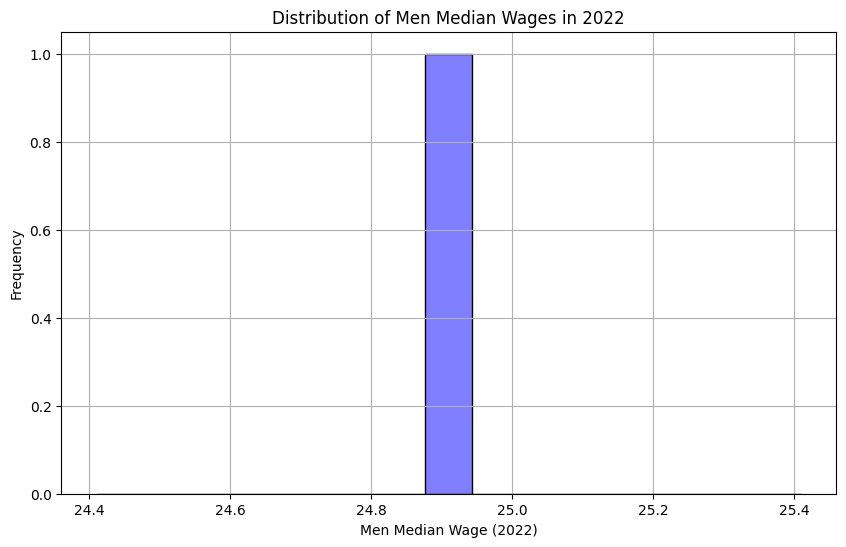

In [11]:
year_2022_data = df[df['year'] == 2022]


plt.figure(figsize=(10, 6))
sns.histplot(data=year_2022_data, x='men_median', bins=15, kde=True, color='blue')
plt.xlabel('Men Median Wage (2022)')
plt.ylabel('Frequency')
plt.title('Distribution of Men Median Wages in 2022')
plt.grid(True)
plt.show()

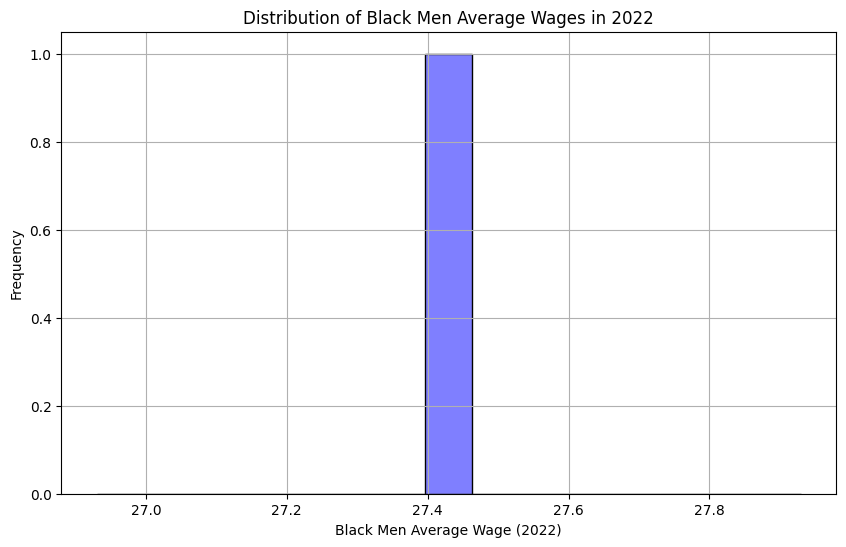

In [12]:
year_2022_data = df[df['year'] == 2022]

plt.figure(figsize=(10, 6))
sns.histplot(data=year_2022_data, x='black_men_average', bins=15, kde=True, color='blue')
plt.xlabel('Black Men Average Wage (2022)')
plt.ylabel('Frequency')
plt.title('Distribution of Black Men Average Wages in 2022')
plt.grid(True)
plt.show()

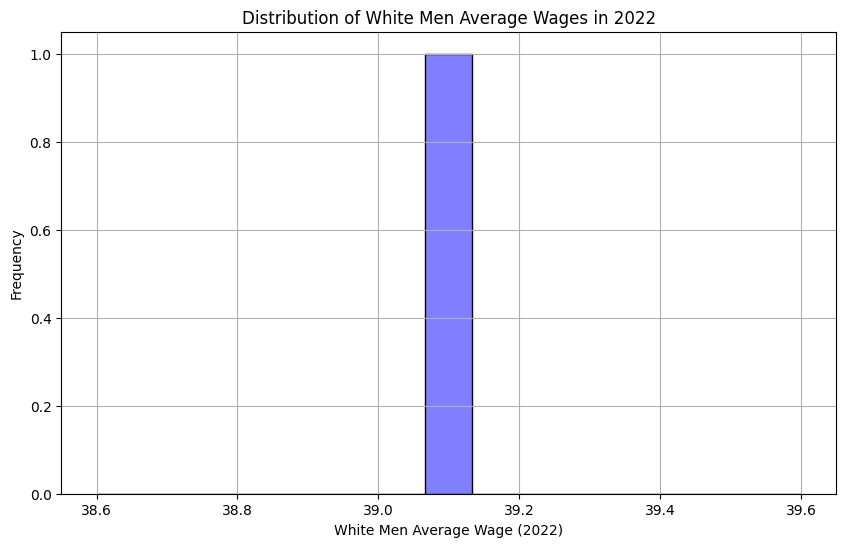

In [13]:
year_2022_data = df[df['year'] == 2022]

# Creating a histogram for men's median wages in 2022
plt.figure(figsize=(10, 6))
sns.histplot(data=year_2022_data, x='white_men_average', bins=15, kde=True, color='blue')
plt.xlabel('White Men Average Wage (2022)')
plt.ylabel('Frequency')
plt.title('Distribution of White Men Average Wages in 2022')
plt.grid(True)
plt.show()

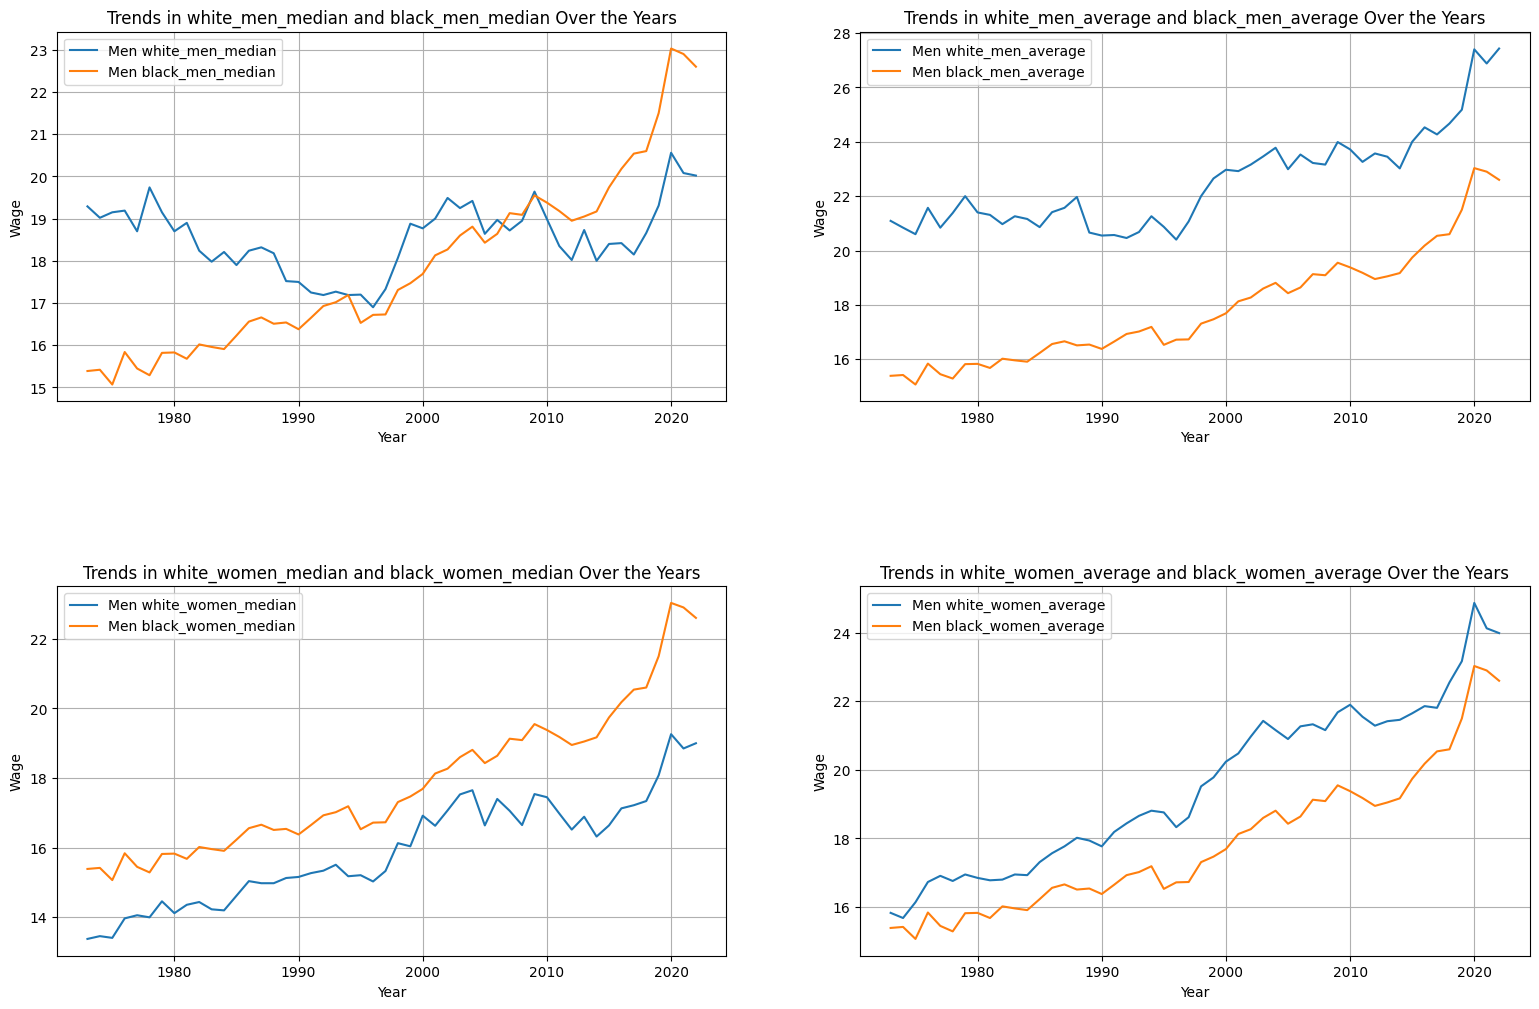

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

year = df['year']
columns_to_plot_viceversa = [
    ('white_men_median', 'black_men_median'),
    ('white_men_average', 'black_men_average'),
    ('white_women_median', 'black_women_median'),
    ('white_women_average', 'black_women_average'),
]

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 12))
fig.subplots_adjust(hspace=0.5)

for i, (col1, col2) in enumerate(columns_to_plot_viceversa):
    row = i // 2
    col = i % 2
    
    # Data
    men_data = df[col1]
    men_data = df[col2]
    
    # Creating a line plot
    sns.lineplot(x=year, y=men_data, label=f'Men {col1}', ax=axes[row, col])
    sns.lineplot(x=year, y=women_data, label=f'Men {col2}', ax=axes[row, col])
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Wage')
    axes[row, col].set_title(f'Trends in {col1} and {col2} Over the Years')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.show()

In [ ]:
# wage gap between men and women for each year
df['wage_gap'] = df['men_median'] - df['women_median']

# Create a line plot to show the trend in the wage gap
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wage_gap', data=df)
plt.xlabel('Year')
plt.ylabel('Wage Gap (Men - Women)')
plt.title('Trend in Gender Wage Gap Over the Years')
plt.grid(True)
plt.show()

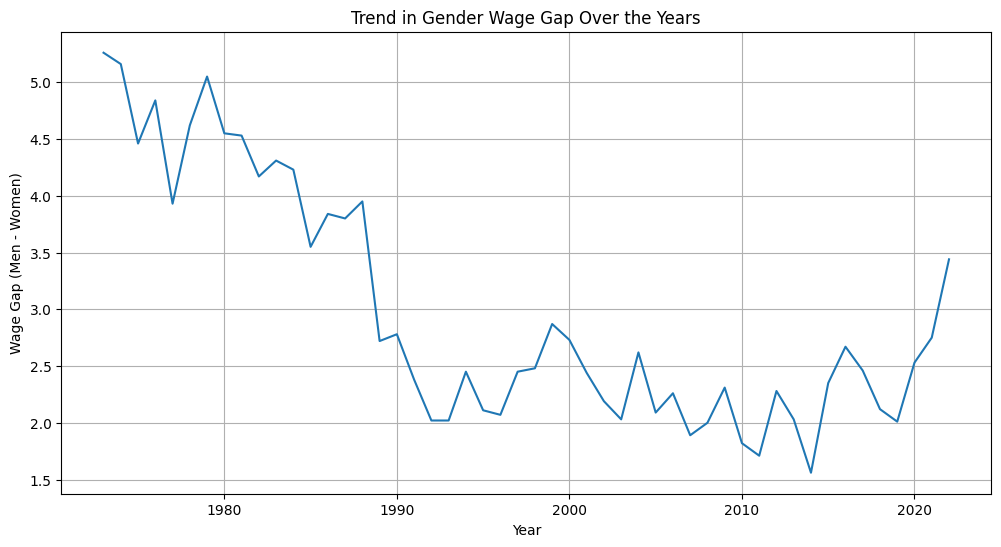

In [17]:
# wage gap between black men and women for each year
df['wage_gap'] = df['black_men_average'] - df['black_women_average']

# Create a line plot to show the trend in the wage gap
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wage_gap', data=df)
plt.xlabel('Year')
plt.ylabel('Wage Gap (Men - Women)')
plt.title('Trend in Gender Wage Gap Over the Years')
plt.grid(True)
plt.show()

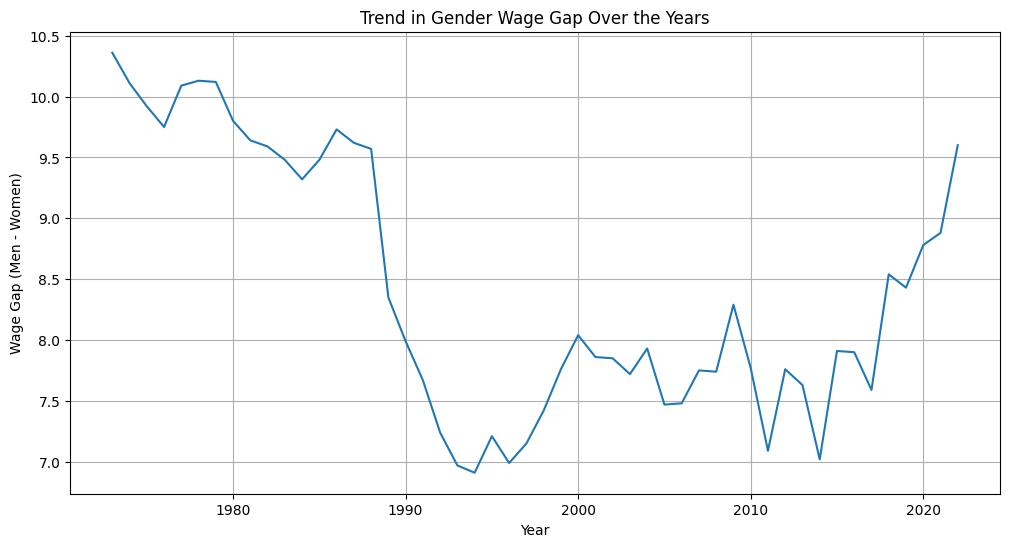

In [18]:
# wage gap between white men and women for each year
df['wage_gap'] = df['white_men_average'] - df['white_women_average']

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wage_gap', data=df)
plt.xlabel('Year')
plt.ylabel('Wage Gap (Men - Women)')
plt.title('Trend in Gender Wage Gap Over the Years')
plt.grid(True)
plt.show()

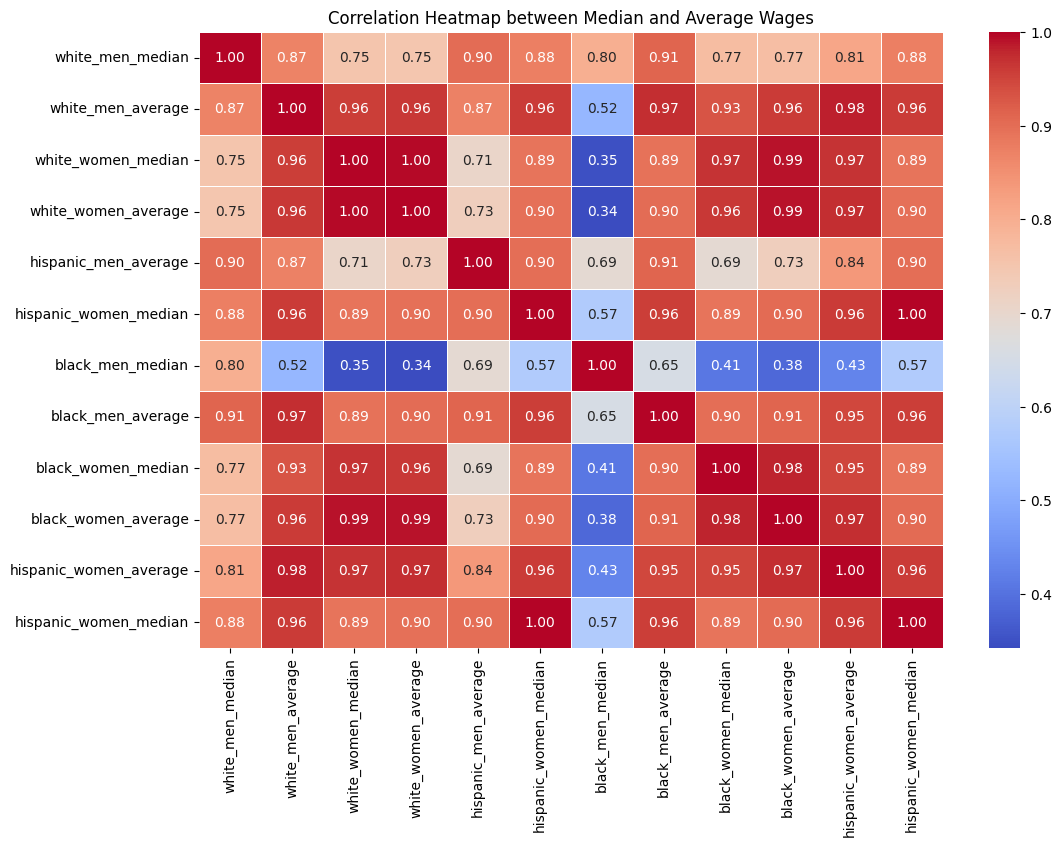

In [19]:
# Selecting the columns for correlation analysis
columns_to_correlate = [
    ('white_men_median', 'black_men_median'),
    ('white_men_average', 'black_men_average'),
    ('white_women_median', 'black_women_median'),
    ('white_women_average', 'black_women_average'),
    ('hispanic_men_average', 'hispanic_women_average'),
    ('hispanic_women_median', 'hispanic_women_median')
]

# Creating a DataFrame for correlation analysis
correlation_data = df[[col[0] for col in columns_to_correlate] + [col[1] for col in columns_to_correlate]]

# Calculating correlations using Pearson correlation coefficient
correlation_matrix = correlation_data.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Median and Average Wages')
plt.show()

1.Within-Group Consistency:

* There is a strong positive correlation between median and average wages within the same demographic group. 
* This suggests that, on average, when median wages increase or decrease, average wages within the same group tend to follow a similar pattern. This consistency is expected.

2.Gender Wage Disparities:

* Gender wage disparities are evident across different demographic groups. 
* For example, white men generally earn more than white women, as indicated by the strong positive correlations between these groups. 
* Similar patterns can be observed for other racial or ethnic groups.

3.Intra-Demographic Variability:

* Some groups, such as black men and black women, show relatively weaker correlations between median and average wages. 
* This suggests that within these groups, there may be greater variability or different wage trends that don't align perfectly between median and average wages.
* These weaker correlations could be indicative of factors other than gender or race/ethnicity influencing wage disparities within these specific groups.

# Data Transformation to aid our analysis.

In [20]:
# Calculating the difference between median and average wages for men and women
df['men_wage_disparity'] = df['men_average'] - df['men_median']
df['women_wage_disparity'] = df['women_average'] - df['women_median']

# Print the first few rows to see the result
print(df[['year', 'men_median', 'women_median', 'men_wage_disparity', 'women_wage_disparity']].head())

   year  men_median  women_median  men_wage_disparity  women_wage_disparity
0  2022       24.91         20.74               10.91                  7.12
1  2021       24.93         21.46               10.68                  6.82
2  2020       25.95         21.72               10.08                  7.03
3  2019       24.04         20.42                9.61                  6.41
4  2018       23.42         19.73                9.77                  6.48


1.Wage Disparities Over Time: 
* It's evident that, in general, men tend to have higher median wages compared to women for each year.

2.Wage Disparity Trends: 
* The positive values in these columns indicate that, on average, the average wages are higher than the   median wages for both men and women.
* This suggests that there might be some wage inequality within these groups.

3.Yearly Variation: 
* The wage disparities and median wages vary from year to year. 
* For example, in 2022, the wage disparity between men's average and median wages is 10.91, while for women, it's 7.12.

In [26]:
# Calculating the difference between median and average wages for men and women
df['black_men_wage_disparity'] = df['black_men_average'] - df['black_men_median']
df['black_women_wage_disparity'] = df['black_women_average'] - df['black_women_median']

print(df[['year', 'black_men_median', 'black_women_median', 'black_men_wage_disparity', 'black_women_wage_disparity']].head())

   year  black_men_median  black_women_median  black_men_wage_disparity  \
0  2022             20.02               19.00                      7.41   
1  2021             20.08               18.85                      6.80   
2  2020             20.56               19.26                      6.84   
3  2019             19.31               18.08                      5.87   
4  2018             18.66               17.34                      6.01   

   black_women_wage_disparity  
0                        4.99  
1                        5.28  
2                        5.61  
3                        5.09  
4                        5.21  


1.Gender-Based Wage Disparities:
* The data shows that, in general, black men tend to have higher median wages compared to black women for each year. 
* This is evident from the higher values in the "black_men_median" column compared to the "black_women_median" column.

2.Wage Disparity Trends: 
* The columns "black_men_wage_disparity" and "black_women_wage_disparity" represent the wage disparities within the respective gender groups.
* Both black men and black women experience wage disparities, with average wages being higher than median wages for both groups.

3.Yearly Variation: 
* The wage disparities and median wages vary from year to year. 
* For example, in 2022, the wage disparity between black men's average and median wages is 7.41, while     for black women, it's 4.99.

In [22]:
# Calculate the difference between median and average wages for men and women
df['white_men_wage_disparity'] = df['white_men_average'] - df['white_men_median']
df['white_women_wage_disparity'] = df['white_women_average'] - df['white_women_median']

# Print the first few rows to see the result
print(df[['year', 'white_men_median', 'white_women_median', 'white_men_wage_disparity', 'white_women_wage_disparity']].head())

   year  white_men_median  white_women_median  white_men_wage_disparity  \
0  2022             27.11               22.47                     11.99   
1  2021             27.76               22.76                     11.02   
2  2020             28.36               23.05                     10.72   
3  2019             27.39               22.01                      9.45   
4  2018             26.79               21.75                      9.76   

   white_women_wage_disparity  
0                        7.03  
1                        7.14  
2                        7.25  
3                        6.40  
4                        6.26  


1.Gender-Based Wage Disparities: 
* The data illustrates significant wage disparities between white men and white women for each year. 
* White men consistently have higher median wages compared to white women.

2.Wage Disparity Trends: 
* The columns "white_men_wage_disparity" and "white_women_wage_disparity" represent the wage disparities within the respective gender groups.
* Both white men and white women experience wage disparities, with average wages being higher than median wages for both groups.

3.Yearly Variation: 
* The wage disparities and median wages vary from year to year.
* For example, in 2022, the wage disparity between white men's average and median wages is 11.99, while   for white women, it's 7.03.

---

# After conducting an Exploratory Data Analysis (EDA) on the provided dataset, several key findings and   insights have emerged:

**1.Gender-Based Wage Disparities:** The analysis revealed significant and persistent gender-based wage disparities across various demographic groups, including white, black, and Hispanic communities. In general, men tend to earn higher median wages compared to women within these groups.

**2.Temporal Trends:** Over the years from 2018 to 2022, wage disparities have shown variations. While the wage gap exists in each year, the degree of disparity and trends may differ. Further analysis can help identify whether these disparities are narrowing or widening over time.

**3.Wage Disparity Within Groups:** The analysis also showed that both men and women within each demographic group experience wage disparities between median and average wages. This suggests that wage inequality exists not only across gender but also within each group.

**4.Comparative Analysis:** Comparative analyses between different demographic groups can provide insights into the intersectionality of wage disparities. It's essential to consider the unique challenges faced by different communities and demographics.

**5.Policy and Equity Implications:** The findings from this EDA emphasize the importance of addressing wage disparities and gender-based inequalities. Policies and initiatives aimed at promoting gender and wage equity should be informed by data-driven insights.

**6.Summary of EDA:**

The Exploratory Data Analysis (EDA) conducted on the dataset revealed consistent gender-based wage disparities within various demographic groups, including white, black, and Hispanic communities. Wage disparities were observed in each year from 2018 to 2022, with men generally earning higher median wages compared to women within these groups. Further analysis can provide a deeper understanding of the factors contributing to these disparities and inform strategies for addressing them. The data underscores the importance of promoting equity in wages and ensuring fair compensation for all individuals, regardless of gender or demographic background.